In [ ]:
library(tidyverse)
library(latex2exp)
df<- read_table2("C:/Users/Lee Sak Park/Desktop/Spring 2020/Linear Model/Notes/data_set.txt", 
                 col_names = FALSE)
colnames(df) = c("Y",'X1','X2','X3')
y = df$Y %>% as.matrix
J = rep(1, length(y))
X = cbind(J, df[c('X1','X2','X3')]) %>% as.matrix
colnames(y) = NULL
colnames(X) = NULL
H = X %*% solve(t(X) %*% X) %*% t(X)
h = diag(H)

<font size=5> <b> $\S$ 10.3 Identifying Outlying X Observations - Hat Matrix Leverage Values </b> </font>

<font size = 3> <b>Studentized Residuals and Deleted Residuals - To find outliers </b> </font>

1. Studentized Residuals

<center> $r_i = \frac{e_i}{s \{ e_i \}}$, where $ s \{ e_i \} = \sqrt{MSE \cdot (1 - h_{ii})}  $ </center> 

and <b> $r_i \sim t(n-p)$ </b>



2. Deleted Residuals

<b> <u> Definition </u> </b> $d_i$:

<center> $d_i = Y_i - \hat{Y}_{i(i)}$ </center>


<center> $d_i = \frac{e_i}{1-h_{ii}}$ </center>


<b> <u> Definition </u> </b> $s^2 \{ d_i \}$:

<center> $s^2 \{ d_i \} = MSE_{(i)}\cdot (1+ X^t_{i} ( X^t_{(i)} X_{(i)} )^{-1} X_{i}) = \frac{MSE_{(i)}}{1-h_{ii}} $ </center>


$\Rightarrow \frac{d_i}{s \{ d_i \}} \sim t(n-p-1) $


<b> <u> Test for outlier </u> </b>

Let $t_i = \frac{d_i}{s \{ d_i \}} = \frac{e_i}{\sqrt{MSE_{(i)} \cdot (1-h_{ii})}} \sim t(n-p-1)$


Since $(n-p) \cdot MSE = SSE = SSE_{(i)} + d_i = (n-p-1) \cdot MSE_{(i)} + \frac{e^2_i}{(1-h_{ii})} $, it follows that


<center>$t_i = \frac{d_i}{s \{ d_i \}}  = e_i \big[ \frac{n-p-1}{SSE \cdot (1-h_{ii}) - e_i^2} \big]^{1/2} $</center>



<font size = 2.2> <b>  Note: for the test, use either Bonferroni critical value or Tucky's  </b> </font>



<hr>

<font size = 3> <b>Property of the hat matrix </b> </font>


1. <center> $ 0 \leq h_{ii} \leq 1$ and $\Sigma_{i=1}^{n} h_{ii} = p$ </center>


2. $\bar{Y}_i$ is a linear combination of the observed $Y$ values, because <center> $\hat{Y} = H Y  \Rightarrow \bar{Y}_i = h_{i1} Y_1 + h_{i2} Y_2 + \dots + h_{in} Y_n $</center>

<font size = 1.9> <b> Implication </b> : the larger $h_{ii}$, the more important is $Y_i$ in determining $\hat{Y}_i$ </font>

3. The larger $h_{ii}$, the smaller $\sigma^2 \{ e_i \} = \sigma^2 (1-h_{ii})$


4. $\bar{h} = \frac{p}{n}$

<hr>


<font size = 3> <b> Detecting Outlying Cases </b> </font>

Leverage values, $h_{ii}$'s, <b> greater </b> than $\frac{2p}{n} = 2 \bar{h}$ are considered to indicate outlying cases with regard to their X values

<hr>

<font size = 3> <b> Use of Hat Matrix to Identify Hidden Extrapolation </b> </font>

a leverage of the new set of X values = <center> $h_{new, new} = X^t_{new} (X^t X )^{-1} X_{new}$ </center>

If $h_{new, new}$ is well within the range of leverage values $h_{i,i}$, no extrapolation is involved.

However, if $h_{new, new}$ is much larger than the leverage values, an extrapolation is indicated

<hr> 



<font size = 3> <b> Influence on Single Fitted Value - DFFITS </b> </font>

The <b> DFFITS </b> measure considers the influence of the i$^{th}$ case on the fitted value $\hat{Y}_i$.

<center> $(DFFITS)_i = \frac{\hat{Y}_i -\hat{Y}_{i(i)}}{\sqrt{MSE_{(i)} h_{ii}}} = t_i \big( \frac{h_{ii}}{1-h_{ii}}  \big)^{1/2}$  </center>

<font size = 1.9> Note: $\sigma^2 \{ \hat{Y}_i \} = \sigma^2 h_{ii} \Rightarrow \hat{\sigma^2 \{ \hat{Y}_i \}} = MSE \cdot h_{ii}$ </font>

<hr>

<font size = 3> <b> Influence on All Fitted Value - Cook's Distance ($D_i$) </b> </font>

<center> $D_i = \frac{\Sigma_{j=1}^n (\hat{Y}_j - \hat{Y}_{j(i)})^2}{p\cdot MSE} = \frac{(\hat{Y} - \hat{Y}_{(i)})^t (\hat{Y} - \hat{Y}_{(i)})}{p \cdot MSE} = \frac{e^2_i}{p \cdot MSE} \big[ \frac{h_{ii}}{(1-h_{ii})^2} \big] \sim F_{(p,n-p)}$   </center>


<u> Another equation </u>

<center> $D_i = \frac{ (b - b_{(i)})^t X^t X (b- b_{(i)})  }{ p \cdot MSE  }      $   </center>

and  $\frac{ (b - B)^t X^t X (b- B)  }{ p \cdot MSE  }  \sim F_{(1- \alpha; p, n-p)}    $  


<hr>

<font size = 3> <b> Influence on the Regression Coefficients - DFBETAS </b> </font>

<center> $(DFBETAS)_{k(i)} = \frac{b_k - b_{k(i)}}{\sqrt{MSE_(i) c_{kk}}}$ </center>

where $b_{k(i)}$ = the regression coefficient obtained when the i$^{th}$ case is omitted

$c_{kk}$ = the $k^{th}$ diagonal element of $(X^t X)^{-1}$

<font size = 1.9> <u> Note: $\sigma^2 \{ b_k \} = \sigma^2 c_{kk}$  </u>  </font>


<b> Example 1. Detecting the outlying cases </b>

In [2]:
result = c()
for (r in 1:dim(H)[1]){
    if(diag(H)[r] > 8/dim(H)[1]){
    result = c(result, r)    
    }}
result

[1]  3  5 16 21 22 43 44 48

<b> Example 2. Testing DFFITS </b>

In [1]:
dffits = rep(NA, dim(X)[1])
model = lm(Y~., data = df)
for(r in 1:dim(H)[1]){
    e = model$residuals[[r]]
    n = dim(X)[1]
    p = dim(X)[2]
    SSE = model$residuals^2 %>% sum()
    dffits[r] = e*( (n-p-1 ) / ( SSE * (1-h[r] ) - e^2) )^(1/2) * ( ( h[r] ) / ( 1 - h[r] ) )^(1/2)   
}

threshold = sqrt(dim(X)[2]/dim(X)[1]) *2

ERROR: Error in eval(expr, envir, enclos): object 'X' not found


In [4]:
# if it is considered as a midium size data-set
sum(abs(dffits) > threshold)
# if it is considered as a small size data-set
sum(abs(dffits) > 1)

[1] 2

[1] 0

<b> Example 3: Cook's distance </b>

In [5]:
cooks = rep(NA, dim(X)[1])
model = lm(Y~., data = df)
for(r in 1:dim(H)[1]){
    e = model$residuals[[r]]
    n = dim(X)[1]
    p = dim(X)[2]
    MSE = (summary(model)[[6]])^2
    cooks[r] = e^2/(p*MSE)  *  (h[r]/(1-h[r])^2)   
}


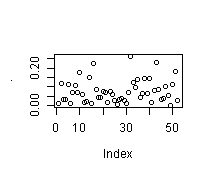

In [31]:
options(repr.plot.width = 3, repr.plot.height = 2.5, repr.plot.res = 70)
qf(cooks, dim(X)[2],dim(X)[1]) %>% plot()

<b> Example 4: DFBETAS </b>

In [7]:
dfbetas = matrix(rep(NA, length(X)), nrow = dim(X)[1])
b = (model$coefficients %>% as.vector)
xx = (X %>% t()) %*% X %>% solve() %>% diag()
for(i in 1:dim(X)[1]){
    new_df = df[c(-i),]
    new_model = lm(Y~., data = new_df)
    new_b = new_model$coefficients %>% as.vector
    for (k in 1:dim(X)[2]){
        c = xx[k]
        MSE = (summary(new_model)[[6]])^2
        num = b[k] - new_b[k]
        den = (  MSE * c   )^.5
        dfbetas[i,k] = (num/den)        
    }
}

In [8]:
result = c()

for(n in 1:dim(dfbetas)[1]){
    count = 0
    for(m in 1:dim(dfbetas)[2]){
        if(dfbetas[n,m]>1){
            count = count+1
        }
    }
    if(count > 0){
        result = c(result, n)
    }
}

result

NULL

In [9]:
sum(dfbetas>1)

[1] 0

<font size=5> <b> $\S$ 10.5 Multicollinearity Diagnostics - Variance Inflation Factor </b> </font>

<b> Derivation </b>

<center> $ \sigma^2 \{  b \} = \sigma^2 (X^t X)^{-1} $ </center>


With the standardized regression coefficients, 
<center>$ \sigma^2 \{  b^* \} = (\sigma^*)^2 ({X^{*}}^t X^*)^{-1} =  (\sigma^*)^2 r_{XX}^{-1} $</center> 


Let $(VIF)_k$ be the k$^{th}$ diagonal element of the matrix $r_{XX}^{-1}$. Then,


<center> $ \sigma^2 \{  b^*_k \} =  (\sigma^*)^2 (VIF)_k $ </center>


<b> <u>Note</u></b> that $(VIF)_k = (1- R-K^2)^{-1}$, k = 1,2, $\dots$, p-1

where $R_k^2$ is the coefficient of multiple determination when $X_k$ is regressed on the p-2 other $X$ variables in the model.



Therefore, $ \sigma^2 \{  b^*_k \} $ becomes, 


<center> $ \sigma^2 \{  b^*_k \}  = \frac{(\sigma^*)^2}{1-R_k^2}$ </center> 



<b> <u>Rule of Thumb</u> </b>

The largest VIF value among all X variables is often used as an indicator of the severity of multicollinearity.

A maximum VIF value in excess of 10 is frequently taken as an indication that mulitcollinearity may be unduly influencing the least square estimates



<b> <u>Definition</u> </b>($\overline{VIF}$) \< the mean of the VIF \>
    
$\overline{VIF} = \frac{\Sigma_{k=1}^{p-1} VIF_k}{p-1}$

In [17]:
VIF(model)

X1       X2       X3 
1.008596 1.019598 1.014364